In [1]:
import numpy as np
from parameter_estimator import ParameterEstimator
import utils
from scipy import linalg
from Pose_Estimation_Class import UKF

In [2]:
theta_nom = ParameterEstimator.dhparams["theta_nom"]
r_nom = ParameterEstimator.dhparams["r_nom"]
d_nom = ParameterEstimator.dhparams["d_nom"]
alpha_nom = ParameterEstimator.dhparams["alpha_nom"]

In [3]:
# pip4 = (np.pi / 4)*0.86
# pip2 = (np.pi / 2) * 0.65

In [4]:
# theta_nom1 = np.array([0,0,0,0,0,0,0]) + theta_nom
# T1 = ParameterEstimator.get_T__i0(7, theta_nom1, d_nom, r_nom, alpha_nom)

# theta_nom2 = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]) + theta_nom
# T2 = ParameterEstimator.get_T__i0(7, theta_nom2, d_nom, r_nom, alpha_nom)

# theta_nom3 = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]) + theta_nom
# T3 = ParameterEstimator.get_T__i0(7, theta_nom3, d_nom, r_nom, alpha_nom)

# theta_nom4 = np.array([0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]) + theta_nom
# T4 = ParameterEstimator.get_T__i0(7, theta_nom4, d_nom, r_nom, alpha_nom)

# theta_nom5 = np.array([0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]) + theta_nom
# T5 = ParameterEstimator.get_T__i0(7, theta_nom3, d_nom, r_nom, alpha_nom)

# theta_nom6 = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]) + theta_nom
# T6 = ParameterEstimator.get_T__i0(7, theta_nom4, d_nom, r_nom, alpha_nom)

In [5]:
ukf = UKF()

In [6]:
X = np.array([[ 0.8660254,  0.0000000,  0.5000000, 0.0000000],
              [ 0.0000000,  1.0000000,  0.0000000, 0.0000000],
              [-0.5000000,  0.0000000,  0.8660254, 0.3000000],
              [ 0.0000000,  0.0000000,  0.0000000, 1.0000000]])
Xinv = np.linalg.inv(X)

In [7]:
utils.roundprint(X)

 0.866  0.000  0.500  0.000 

 0.000  1.000  0.000  0.000 

-0.500  0.000  0.866  0.300 

 0.000  0.000  0.000  1.000 





In [8]:
U = np.array([[-1.0000000,  0.0000000,  0.0000000, 2.0000000],
              [ 0.0000000, -1.0000000,  0.0000000, 2.0000000],
              [ 0.0000000,  0.0000000,  1.0000000, 1.0000000],
              [ 0.0000000,  0.0000000,  0.0000000, 1.0000000]])

In [20]:
from pytransform3d import transformations as pt
T_error = pt.random_transform(np.random.RandomState(0))
utils.roundprint(T_error)
pq_error = pt.pq_from_transform(T_error)
print(pq_error)
pq_error


-0.293 -0.770  0.567  1.868 

 0.939 -0.120  0.322 -0.977 

-0.179  0.627  0.758  0.950 

 0.000  0.000  0.000  1.000 



[ 1.86755799 -0.97727788  0.95008842  0.57996866  0.13155995  0.32178034
  0.73673994]


In [16]:
for i in range(80):
    q_norm = np.random.rand(7)
    q = (q_norm - np.full((7,),0.5))*np.pi/2
    T1 = ParameterEstimator.get_T_jk(0, 7, q, theta_nom, d_nom, r_nom, alpha_nom)
    M1 = Xinv@np.linalg.inv(T1)@U
    
    q_norm = np.random.rand(7)
    q = (q_norm - np.full((7,),0.5))*np.pi/2
    T2 = ParameterEstimator.get_T_jk(0, 7, q, theta_nom, d_nom, r_nom, alpha_nom)
    M2 = Xinv@np.linalg.inv(T2)@U
    
    
    AA = M1@np.linalg.inv(M2)
    BB = np.linalg.inv(T1)@T2
    
    # test=AA@Xinv@np.linalg.inv(BB)@X
    # test = X@AA@Xinv@np.linalg.inv(BB)
    # utils.roundprint(test)
    
    ukf.Update(AA, BB)



.....UKF Results
UKF [euler_rpy(deg) , pos(mm)]: [[-4.73353330e-03 -2.90224585e+01  5.36614961e-01]] [ 17.35785333   0.28475133 -28.99525163]


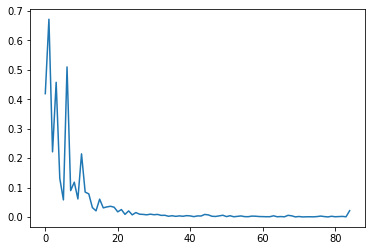

In [17]:
from helpers import Tools
import matplotlib.pyplot as plt
theta = np.linalg.norm(ukf.x[:3])
EPS = 0.0000001
if theta < EPS:
    k = [0, 1, 0]  # VRML standard
else:
    k = ukf.x[0:3] / np.linalg.norm(ukf.x[:3])
euler_ukf = Tools.mat2euler(Tools.vec2rotmat(theta, k))
print('\n')
print('.....UKF Results')
print("UKF [euler_rpy(deg) , pos(mm)]:", np.array([euler_ukf]) * 180 / np.pi, ukf.x[3:] * 100)

plt.plot(range(len(ukf.consistency)), ukf.consistency)
plt.show()